In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# DictVectorizer

from sklearn.feature_extraction import DictVectorizer

data = [
    {"age":4, "height":96},
    {"age":1, "height":73.9},
    {"age":3, "height":88.9},
    {"age":2, "height":81.6},
]

dv = DictVectorizer(sparse=False)
dv.fit_transform(data)

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

In [28]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol',  'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope','ca', 'thal', 'num']
heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None, names=cols)

heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [29]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [30]:
print("Unique values in ca: ", heart_data.loc[:, "ca"].unique())
print("Unique values in thal: ", heart_data.loc[:, "thal"].unique())

Unique values in ca:  ['0.0' '3.0' '2.0' '1.0' '?']
Unique values in thal:  ['6.0' '3.0' '7.0' '?']


In [31]:
print("no of '?' in ca: ", heart_data.loc[heart_data.loc[:, "ca"] == "?", "ca"].count())
print("no of '?' in thal: ", heart_data.loc[heart_data.loc[:, "thal"] == "?", "thal"].count())

no of '?' in ca:  4
no of '?' in thal:  2


In [32]:
# replace all "?" with nan

heart_data.replace("?", np.nan, inplace = True)

In [33]:
# Data Imputation

from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy = "mean")
heart_data_si = si.fit_transform(heart_data)
heart_data_si.shape

(303, 14)

- `add_indicator = True` will add additional columns for each column containing missing values.
- in our case there are two columns with missing values
- `add_indicator` is False by default

In [34]:
si = SimpleImputer(strategy = "mean", add_indicator = True)
heart_data_si = si.fit_transform(heart_data)
heart_data_si.shape

(303, 16)

In [36]:
# Feature Scaling

cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None, names=cols)

abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [38]:
abalone_data.loc[:, "Sex"].unique()

array(['M', 'F', 'I'], dtype=object)

In [39]:
abalone_data.replace({"Sex": {"M":1, "F":2, "I":3}}, inplace = True)
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


<ipython-input-39-895060111b2d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  abalone_data.replace({"Sex": {"M":1, "F":2, "I":3}}, inplace = True)


In [43]:
y = abalone_data["Rings"]
X = abalone_data.drop("Rings", axis = 1)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [44]:
# Examine the feaure scales

X.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050


# Visualization of Feature Distributions

### Feature Histogram

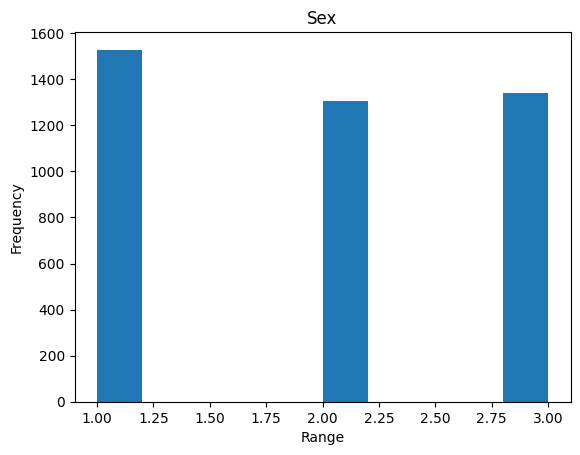

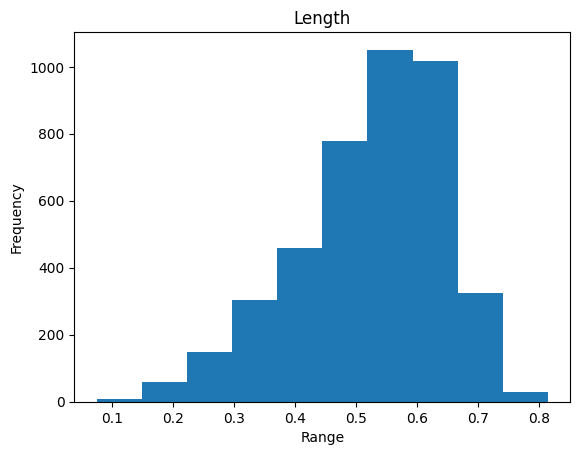

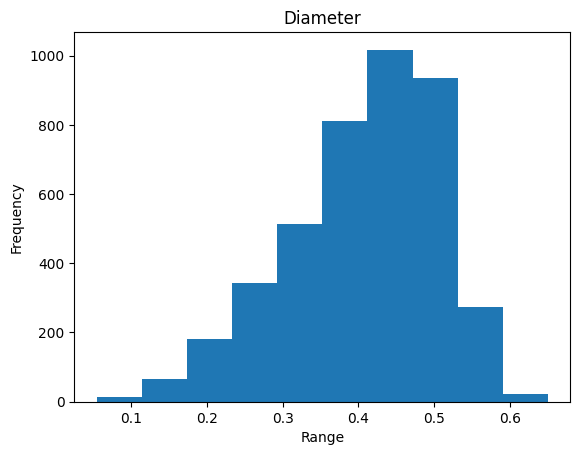

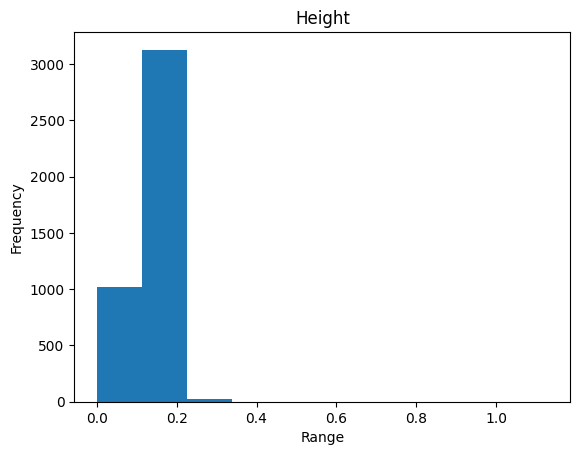

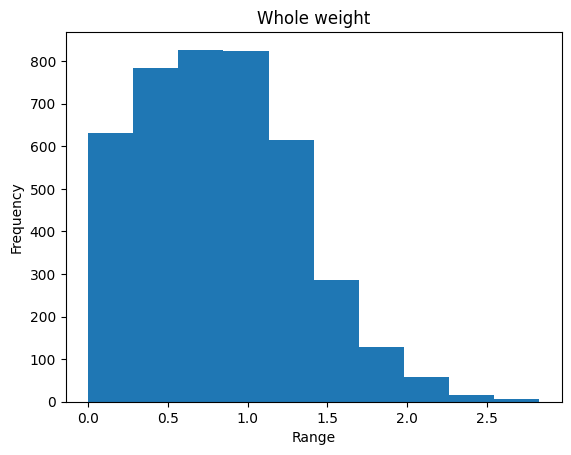

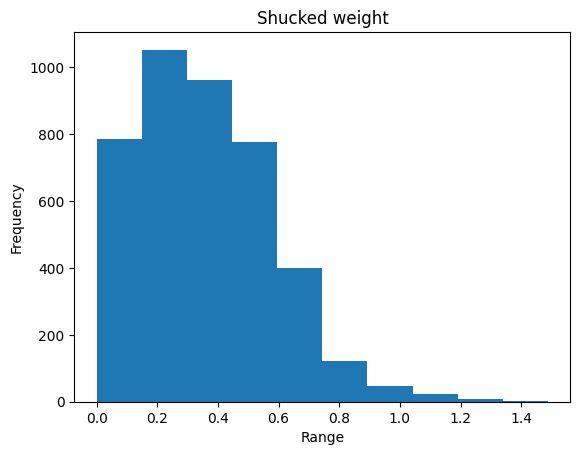

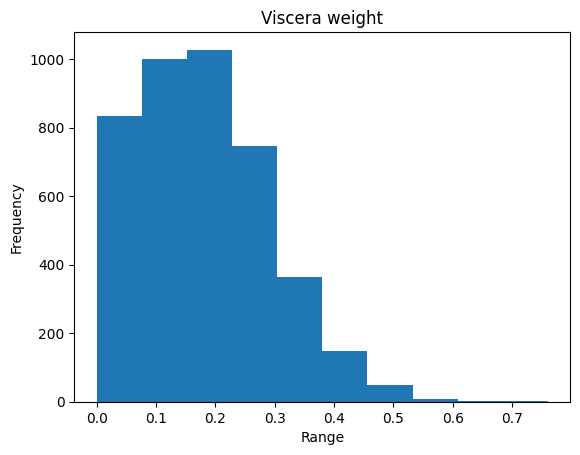

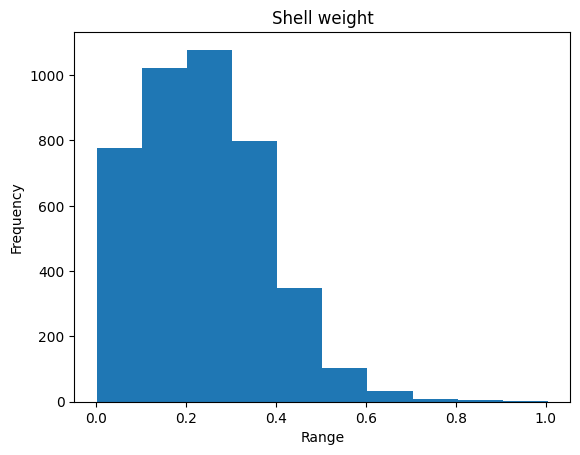

In [45]:
# Seperate Histograms

for name in cols[0: len(cols)-1]:
    plt.hist(X[name].values)    # histogram plot
    plt.title(name)
    plt.xlabel("Range")
    plt.ylabel("Frequency")
    plt.show()

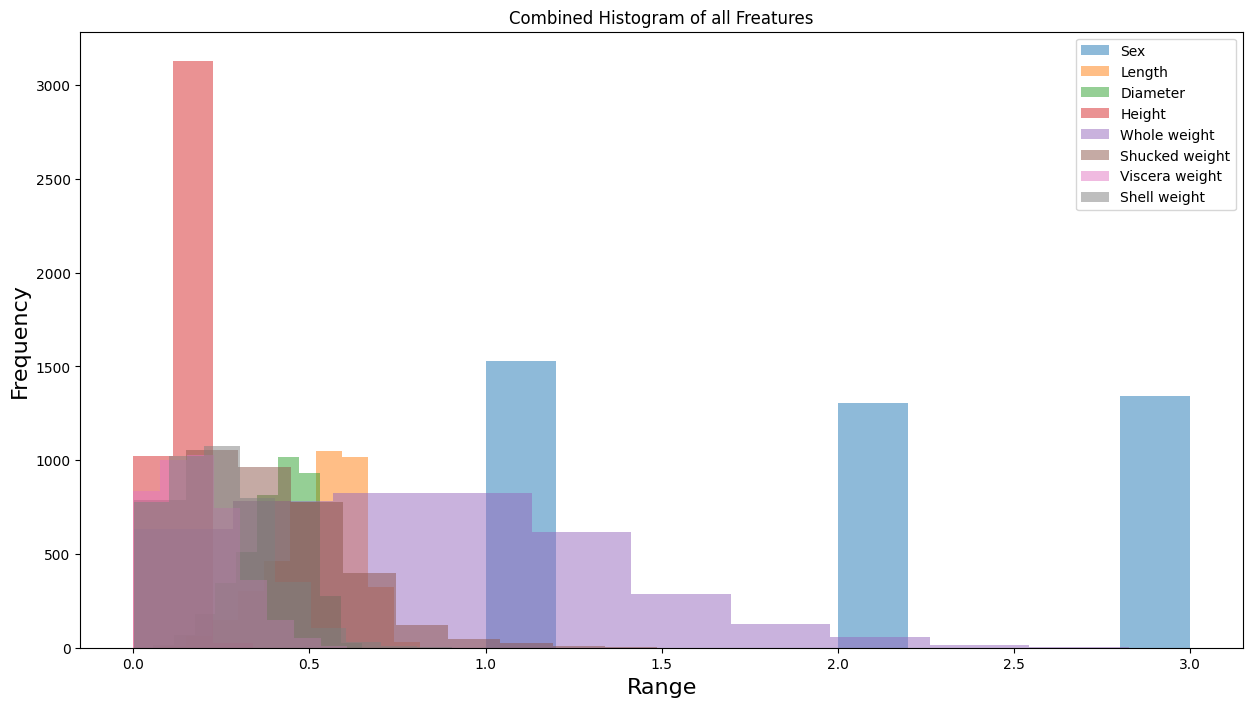

In [48]:
# Combined Histogram

plt.figure(figsize = (15, 8))

for name in X:
    plt.hist(X[name].values, alpha = 0.5)

in_cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

plt.legend(in_cols, loc = "upper right", frameon = True)
plt.title("Combined Histogram of all Freatures")
plt.xlabel("Range", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

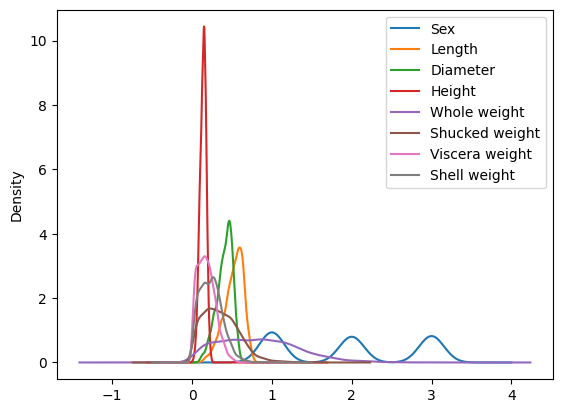

In [49]:
# KDE Plots combined

ax = X.plot.kde()

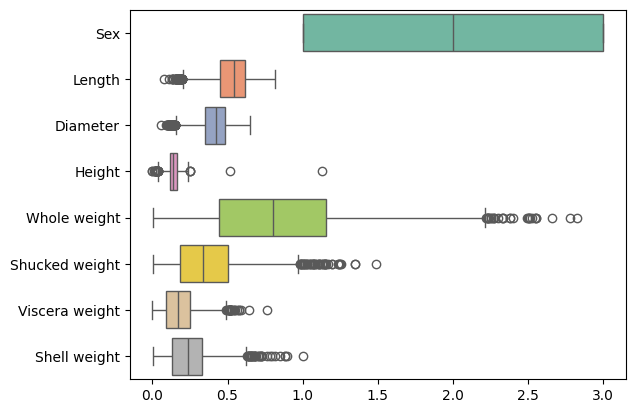

In [52]:
# Box Plot

ax = sns.boxplot(data = X, orient = "h", palette = "Set2")

<ipython-input-62-11fbcd1339a0>:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(data = X, orient = "h", palette = "Set2", scale = "width")


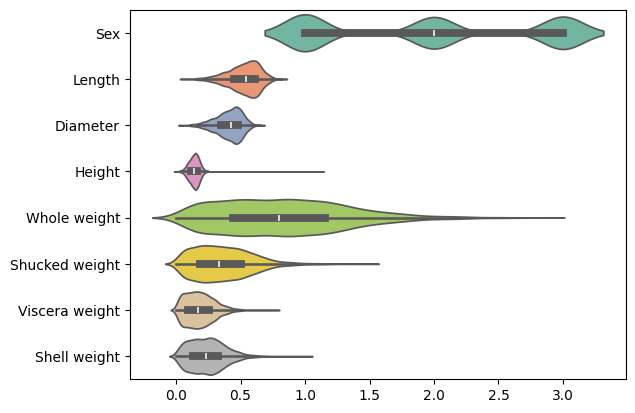

In [62]:
# Violin Plot

ax = sns.violinplot(data = X, orient = "h", palette = "Set2", scale = "width")

# Scaling
- Normalization (ranges between [0, 1] or [-1, 1])
- Standardization (mean is zero with std 1)
## Normalization

### MinMaxScaler



In [66]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

X_normalized = mm.fit_transform(X)
X_normalized[:5]

array([[0.        , 0.51351351, 0.5210084 , 0.0840708 , 0.18133522,
        0.15030262, 0.1323239 , 0.14798206],
       [0.        , 0.37162162, 0.35294118, 0.07964602, 0.07915707,
        0.06624075, 0.06319947, 0.06826109],
       [0.5       , 0.61486486, 0.61344538, 0.11946903, 0.23906499,
        0.17182246, 0.18564845, 0.2077728 ],
       [0.        , 0.49324324, 0.5210084 , 0.11061947, 0.18204356,
        0.14425017, 0.14944042, 0.15296462],
       [1.        , 0.34459459, 0.33613445, 0.07079646, 0.07189658,
        0.0595158 , 0.05134957, 0.0533134 ]])

In [67]:
X_normalized.mean(axis = 0)

array([0.47773522, 0.60674608, 0.59307774, 0.12346584, 0.29280756,
       0.24100033, 0.23712127, 0.2365031 ])

In [68]:
X_normalized.std(axis = 0)

array([0.4138578 , 0.16226829, 0.16676972, 0.03701066, 0.17366046,
       0.14925109, 0.14430695, 0.13870055])

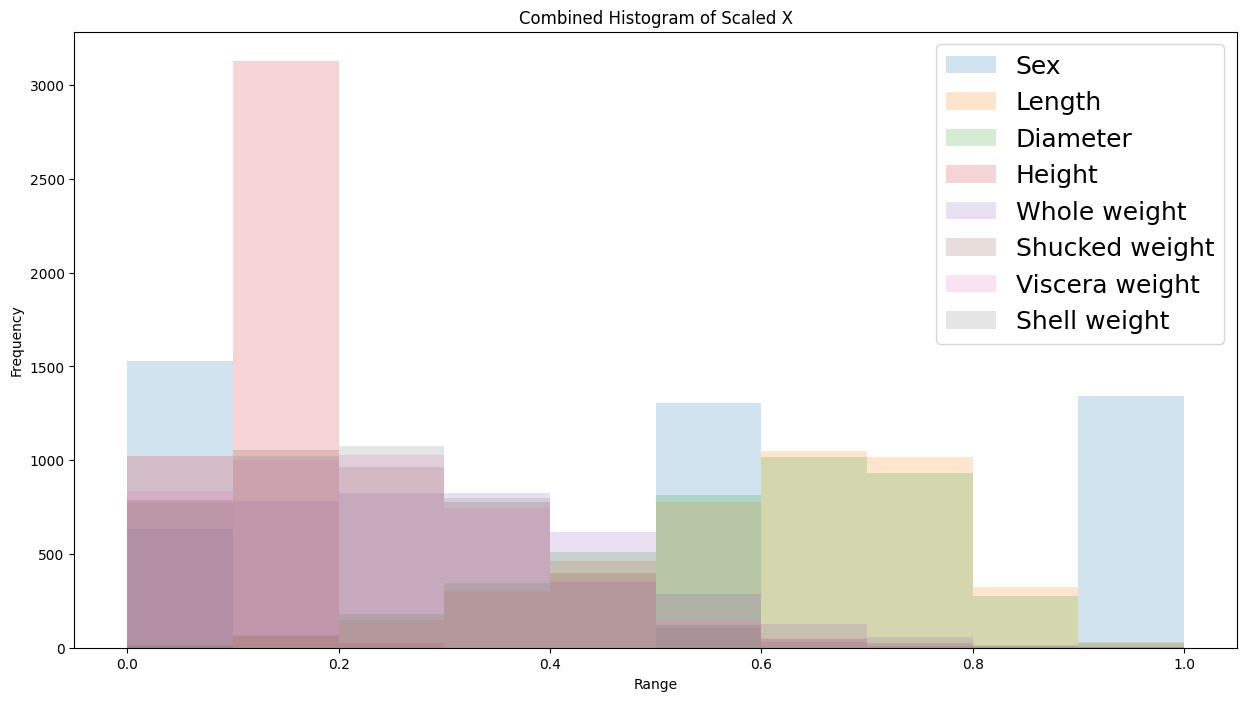

In [69]:
# Combined Histogram of normalized X

plt.figure(figsize = (15, 8))

data = pd.DataFrame(X_normalized, columns = in_cols)

for col_name in X:
    plt.hist(data[col_name].values, alpha = 0.2)

plt.legend(in_cols, fontsize = 18, loc="upper right", frameon = True)
plt.title("Combined Histogram of normalized X")
plt.xlabel("Range")
plt.ylabel("Frequency")

plt.show()

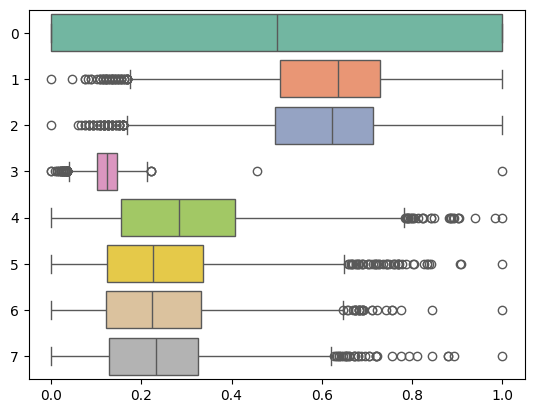

In [70]:
# Box Plot after Scaling

ax = sns.boxplot(data = X_normalized, orient = "h", palette = "Set2")

<ipython-input-71-460f1c69a9a4>:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(data = X_normalized, orient = "h", palette = "Set2", scale = "width")


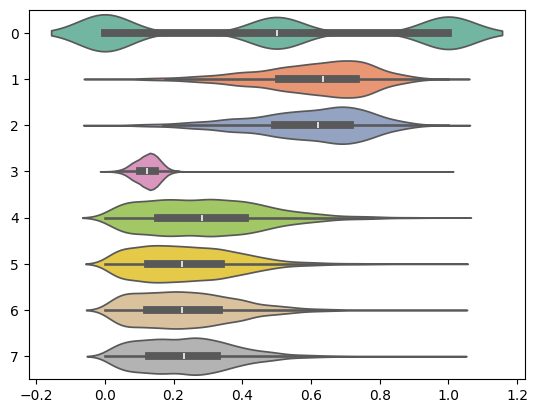

In [71]:
# Violin Plot after normalization

ax = sns.violinplot(data = X_normalized, orient = "h", palette = "Set2", scale = "width")

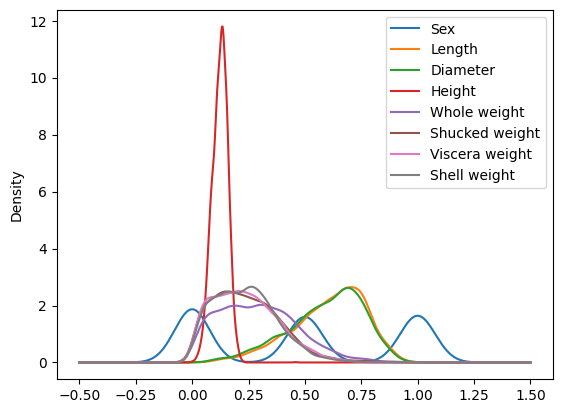

In [72]:
# KDE Plots combined after normalization

ax = data.plot.kde()

### Standardization

In [74]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_standardized = ss.fit_transform(X)
X_standardized[:5]

array([[-1.15434629, -0.57455813, -0.43214879, -1.06442415, -0.64189823,
        -0.60768536, -0.72621157, -0.63821689],
       [-1.15434629, -1.44898585, -1.439929  , -1.18397831, -1.23027711,
        -1.17090984, -1.20522124, -1.21298732],
       [ 0.05379815,  0.05003309,  0.12213032, -0.10799087, -0.30946926,
        -0.4634999 , -0.35668983, -0.20713907],
       [-1.15434629, -0.69947638, -0.43214879, -0.34709919, -0.63781934,
        -0.64823753, -0.60759966, -0.60229374],
       [ 1.26194258, -1.61554351, -1.54070702, -1.42308663, -1.27208566,
        -1.2159678 , -1.28733718, -1.32075677]])

In [78]:
X_standardized.mean(axis=0)

array([-1.19075871e-17, -5.83471770e-16, -3.02792930e-16,  3.91249292e-16,
        9.18585294e-17, -1.02065033e-17,  2.70472337e-16,  2.97689679e-16])

In [76]:
X_standardized.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

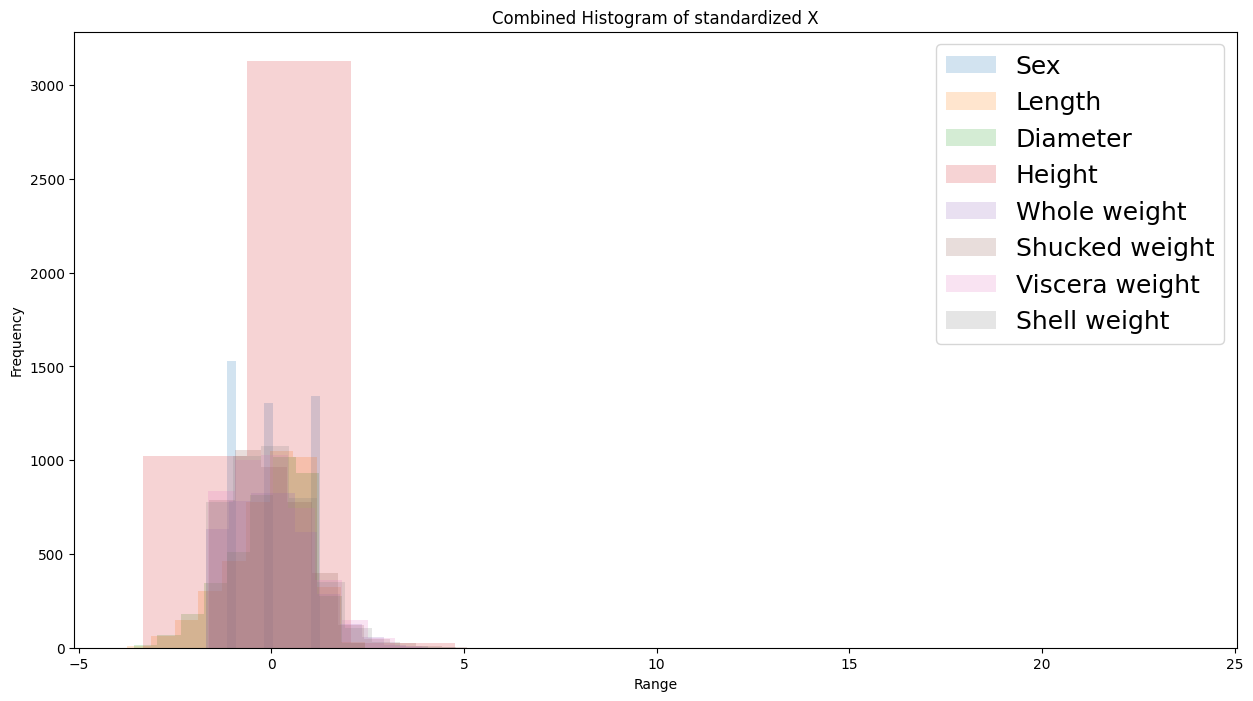

In [79]:
# Combined Histogram of standardized X

plt.figure(figsize = (15, 8))

data = pd.DataFrame(X_standardized, columns = in_cols)

for col_name in X:
    plt.hist(data[col_name].values, alpha = 0.2)

plt.legend(in_cols, fontsize = 18, loc="upper right", frameon = True)
plt.title("Combined Histogram of standardized X")
plt.xlabel("Range")
plt.ylabel("Frequency")

plt.show()

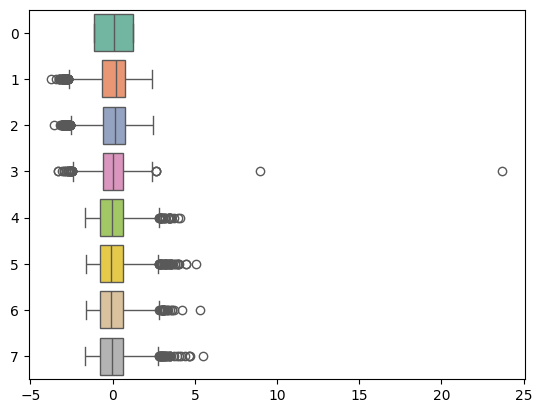

In [80]:
# Box Plot after standardization

ax = sns.boxplot(data = X_standardized, orient = "h", palette = "Set2")

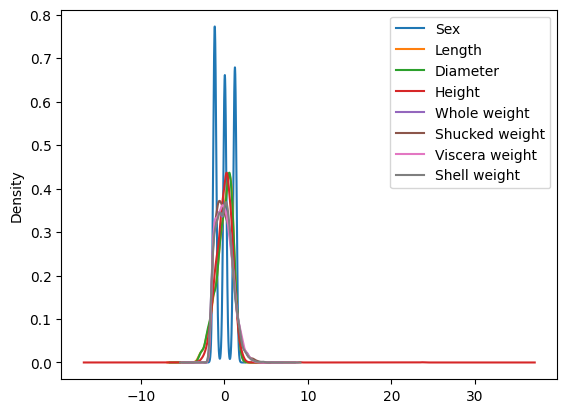

In [83]:
# KDE Plots combined after standardization
ax = data.plot.kde()

<ipython-input-84-4f23e3a11551>:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(data = X_standardized, orient = "h", palette = "Set2", scale = "width")


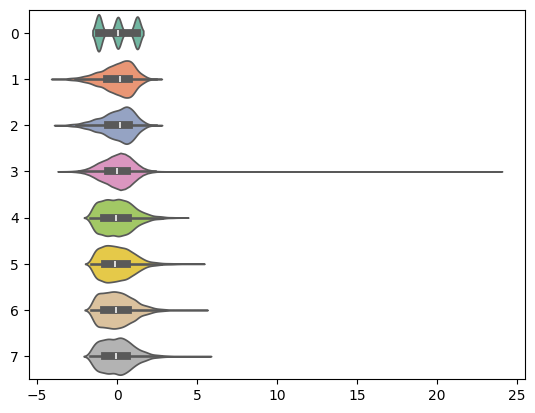

In [84]:
# Violin Plot after standardization

ax = sns.violinplot(data = X_standardized, orient = "h", palette = "Set2", scale = "width")